<a href="https://colab.research.google.com/github/agmarrugo/computer-vision-utb/blob/main/notebooks/connected_components_images_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Binary images and connected components

Andres Marrugo, PhD    
Universidad Tecnológica de Bolívar

Adapted from the [this tutorial][tut] by Adrian Rosenbrock.

[tut]: https://www.pyimagesearch.com/2021/02/22/opencv-connected-component-labeling-and-analysis/ "OpenCV Connected Component Labeling and Analysis - PyImageSearch"

In [4]:
# import cv2 as cv
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 


Grayscale image


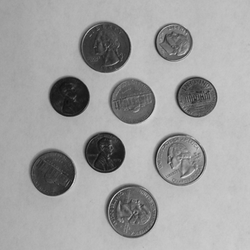

In [24]:
IMAGE_URL = 'https://github.com/agmarrugo/computer-vision-utb/blob/main/data/coins.png?raw=true'

# urllib.request.urlretrieve(IMAGE_URL, 'coins.png')

image = io.imread(IMAGE_URL) 
imageColor = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
# cv2.imshow("Image", image)

# plt.imshow(image)
print("Grayscale image")
cv2_imshow(image)

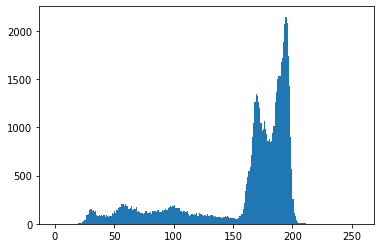

In [10]:
# Let's plot the image histogram

plt.hist(image.ravel(),bins = 256, range = [0,256]) 
plt.show()

### Thresholding

We will threshold the image to convert to a binary image using Otsu's method.

Threshold Binary


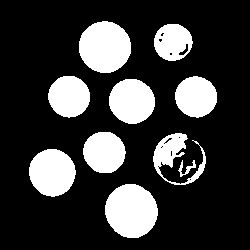

In [14]:
# Inverted binary image
print("Threshold Binary")

(T, threshImg) = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2_imshow(threshImg)

We call `cv2.connectedComponentsWithStats` to perform connected component analysis with OpenCV. 

The `cv2.connectedComponentsWithStats` returns a 4-tuple of:

- The total number of unique labels (i.e., number of total components) that were detected
- A mask named `labels` has the same spatial dimensions as our input thresh image. For each location in `labels`, we have an integer ID value that corresponds to the connected component where the pixel belongs. 
- `stats`: Statistics on each connected component, including the bounding box coordinates and area (in pixels).
- The `centroids` (i.e., center) (x, y)-coordinates of each connected component.

In [16]:
# Apply connected component analysis to the thresholded image

# Connectivity	8 or 4 for 8-way or 4-way connectivity respectively
conn = 8
output = cv2.connectedComponentsWithStats(threshImg, conn, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output


In [17]:
# loop over the number of unique connected component labels
for i in range(0, numLabels):
	# if this is the first component then we examine the
	# *background* (typically we would just ignore this
	# component in our loop)
	if i == 0:
		text = "examining component {}/{} (background)".format(
			i + 1, numLabels)
	# otherwise, we are examining an actual connected component
	else:
		text = "examining component {}/{}".format( i + 1, numLabels)
	# print a status message update for the current connected
	# component
	print("[INFO] {}".format(text))
	# extract the connected component statistics and centroid for
	# the current label
	x = stats[i, cv2.CC_STAT_LEFT]
	y = stats[i, cv2.CC_STAT_TOP]
	w = stats[i, cv2.CC_STAT_WIDTH]
	h = stats[i, cv2.CC_STAT_HEIGHT]
	area = stats[i, cv2.CC_STAT_AREA]
	(cX, cY) = centroids[i]

[INFO] examining component 1/11 (background)
[INFO] examining component 2/11
[INFO] examining component 3/11
[INFO] examining component 4/11
[INFO] examining component 5/11
[INFO] examining component 6/11
[INFO] examining component 7/11
[INFO] examining component 8/11
[INFO] examining component 9/11
[INFO] examining component 10/11
[INFO] examining component 11/11


Let’s now visualize the bounding box and centroid of the current component.

Output


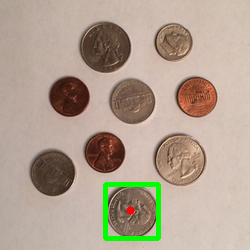

Connected Component


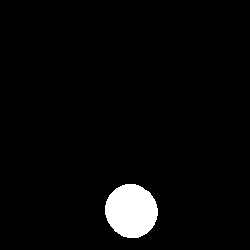

In [48]:
# clone our original image (so we can draw on it) and then draw
# a bounding box surrounding the connected component along with
# a circle corresponding to the centroid

output = imageColor.copy()
cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)

# construct a mask for the current connected component by
# finding a pixels in the labels array that have the current
# connected component ID
componentMask = (labels == i).astype("uint8") * 255
# show our output image and connected component mask
print("Output")
cv2_imshow(output)
 
print("Connected Component")
cv2_imshow(componentMask)

Label No 0


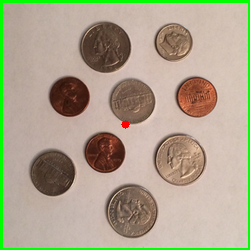

Label No 1


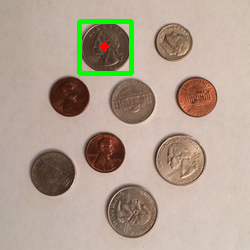

Label No 2


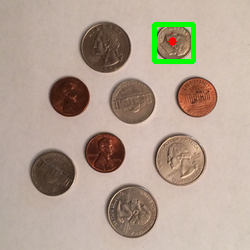

Label No 3


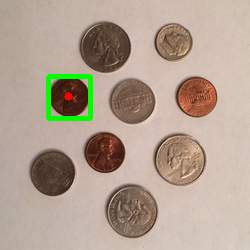

Label No 4


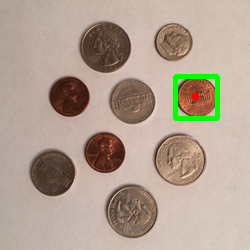

Label No 5


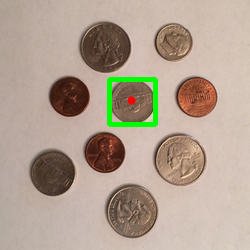

Label No 6


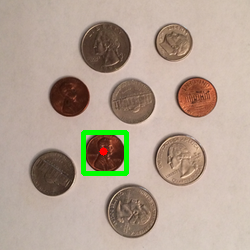

Label No 7


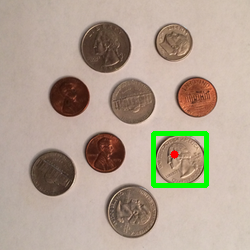

Label No 8


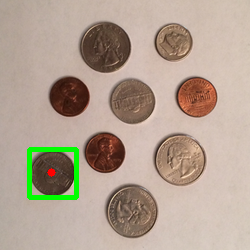

Label No 9


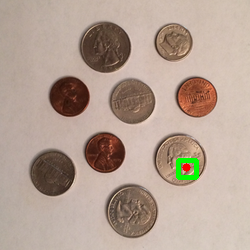

Label No 10


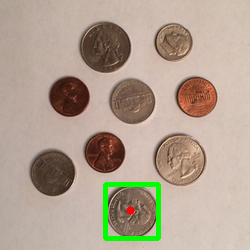

In [60]:
# loop over the number of unique connected component labels
for i in range(0, numLabels):

  # extract the connected component statistics and centroid for
  # the current label
  x = stats[i, cv2.CC_STAT_LEFT]
  y = stats[i, cv2.CC_STAT_TOP]
  w = stats[i, cv2.CC_STAT_WIDTH]
  h = stats[i, cv2.CC_STAT_HEIGHT]
  area = stats[i, cv2.CC_STAT_AREA]
  (cX, cY) = centroids[i]

  # clone our original image (so we can draw on it) and then draw
  # a bounding box surrounding the connected component along with
  # a circle corresponding to the centroid

  output = imageColor.copy()
  cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
  cv2.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)

  print("Label No {}".format(i))
  cv2_imshow(output)



## Removing unwanted objects



[INFO] keeping connected component '1'
Image


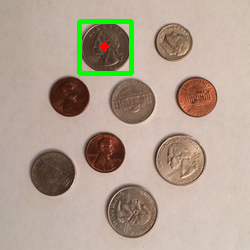

Coins


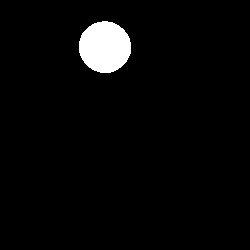

[INFO] keeping connected component '2'
Image


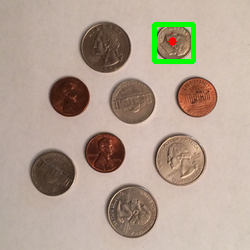

Coins


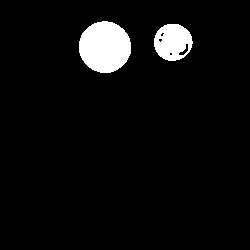

[INFO] keeping connected component '3'
Image


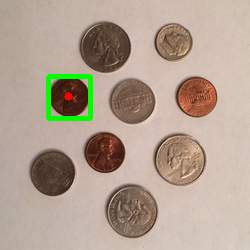

Coins


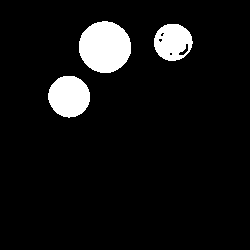

[INFO] keeping connected component '4'
Image


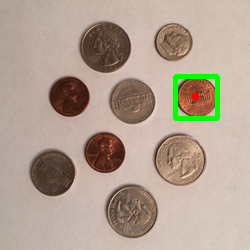

Coins


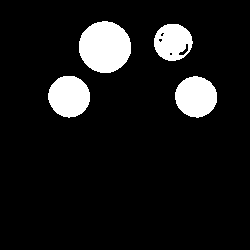

[INFO] keeping connected component '5'
Image


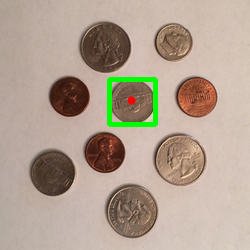

Coins


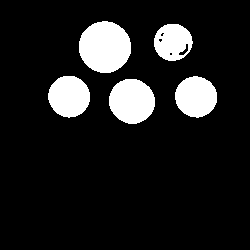

[INFO] keeping connected component '6'
Image


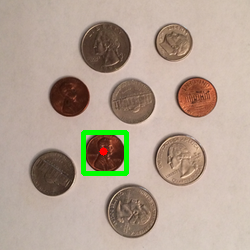

Coins


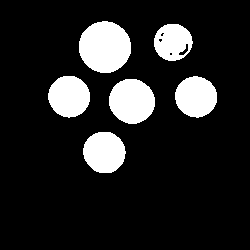

[INFO] keeping connected component '7'
Image


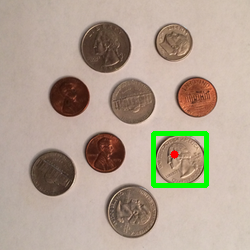

Coins


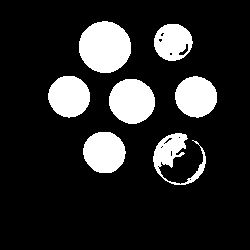

[INFO] keeping connected component '8'
Image


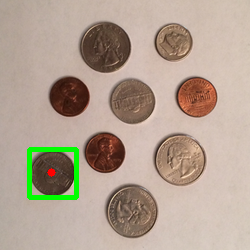

Coins


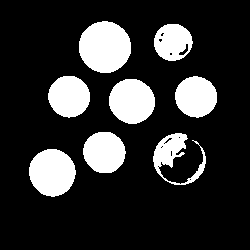

[INFO] keeping connected component '10'
Image


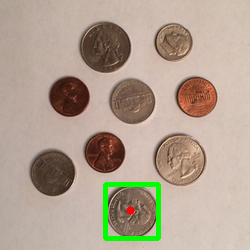

Coins


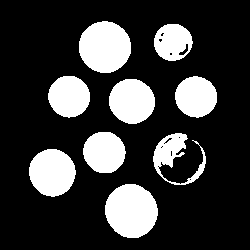

In [73]:
# initialize an output mask to store all characters parsed from
# the license plate
mask = np.zeros(image.shape, dtype="uint8")

# loop over the number of unique connected component labels, skipping
# over the first label (as label zero is the background)
for i in range(1, numLabels):
  # extract the connected component statistics for the current
  # label
  x = stats[i, cv2.CC_STAT_LEFT]
  y = stats[i, cv2.CC_STAT_TOP]
  w = stats[i, cv2.CC_STAT_WIDTH]
  h = stats[i, cv2.CC_STAT_HEIGHT]
  area = stats[i, cv2.CC_STAT_AREA]
  (cX, cY) = centroids[i]

  output = imageColor.copy()
  cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
  cv2.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)
  
  # ensure the width, height, and area are all neither too small
  # nor too big
  keepWidth = w > 5 and w < 200
  keepHeight = h > 20 and h < 200
  keepArea = area > 500 and area < 20000
  # ensure the connected component we are examining passes all
  # three tests
  if all((keepWidth, keepHeight, keepArea)):
    # construct a mask for the current connected component and
    # then take the bitwise OR with the mask
    print("[INFO] keeping connected component '{}'".format(i))
    componentMask = (labels == i).astype("uint8") * 255
    mask = cv2.bitwise_or(mask, componentMask)

    # show the original input image and the mask for the coins
    print("Image")
    cv2_imshow(output)
    print("Coins")
    cv2_imshow(mask)

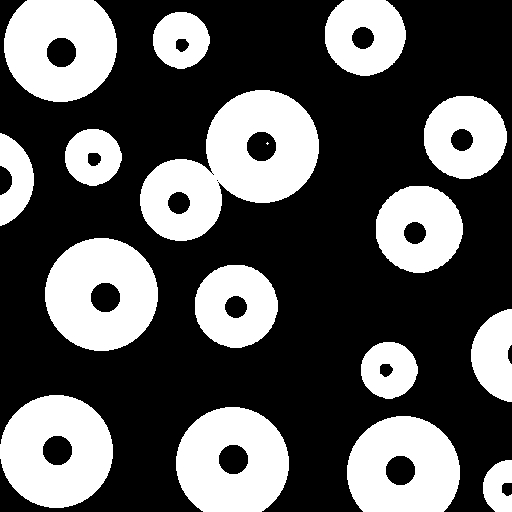

It's a binary image:
 [[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


In [85]:
# TODO process the image blobs.jpg and count the number of white blobs
# using connected components (it's already a binary image)

IMAGE_URL = 'https://github.com/agmarrugo/computer-vision-utb/blob/main/data/blobs.jpg?raw=true'

image2 = io.imread(IMAGE_URL) 

cv2_imshow(image2)

print("It's a binary image:\n", image2)

If you need to use morphological operations you go to [this link][morph] for help.

[morph]: https://docs.opencv.org/4.5.1/d9/d61/tutorial_py_morphological_ops.html "OpenCV: Morphological Transformations"